In [1]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [2]:
!pip install transformers

     |████████████████████████████████| 3.1 MB 7.7 MB/s 
     |████████████████████████████████| 895 kB 59.0 MB/s 
     |████████████████████████████████| 3.3 MB 25.4 MB/s 
     |████████████████████████████████| 59 kB 8.9 MB/s 
     |████████████████████████████████| 596 kB 45.5 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [4]:
!pip install lime

     |████████████████████████████████| 275 kB 7.6 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=2ccf9c50f1bbfd45203938155acd7338da6bad987a8eae3e9a2476a808317722
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


**Import necessary libraries**

In [3]:
## for data
import json
import pandas as pd
import numpy as np

## for plotting
import matplotlib.pyplot as plt
import seaborn as sns

## for processing
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

## for bag-of-words
from sklearn import feature_extraction, model_selection, naive_bayes, pipeline, manifold, preprocessing

## for explainer
from lime import lime_text

## for word embedding
import gensim
import gensim.downloader as gensim_api

## for deep learning
from tensorflow.keras import models, layers, preprocessing as kprocessing
from tensorflow.keras import backend as K

## for bert language model
import transformers

from matplotlib.animation import FuncAnimation

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


ModuleNotFoundError: ignored

In [ ]:


file_no=1

def gettoken():
  with open('/drive/MyDrive/token.txt', 'r') as token:
        gittoken = token.readline().replace("\n","")
  return gittoken

#print(gettoken())

def searchgit(fixes,commits):
    
    params = (
      ('q', fixes),('per_page',100) )
   
    headers = {'Accept': 'application/vnd.github.cloak-preview', 'Authorization': 'token ' + gettoken()}
    url = "https://api.github.com/search/commits"
  
    for i in range(0,100):
        print(i,fixes, commits)
        limit = 0
        while(limit == 0):
            response = requests.get(url,headers=headers,params=(('q',fixes),('per_page',100)))
            head = response.headers      
            if 'X-RateLimit-Remaining' in head:
                limit = int(head['X-RateLimit-Remaining'])
                if limit == 0:
                # Limit of requests per time was reached, sleep to wait until we can request again
                    print("Rate limit. Sleep.")
                    global file_no
                    file_no+=1
                    #file_name = '/drive/MyDrive/git_commits_XSS'+str(file_no)+'.json'
                    #file_name = '/drive/MyDrive/git_commits_SQL'+str(file_no)+'.json'
                    #file_name = '/drive/MyDrive/git_commits_Buffer'+str(file_no)+'.json'
                    file_name = '/drive/MyDrive/git_commits_Improperaccess'+str(file_no)+'.json'
                    print(file_name)
                    content= response.json()
                    with open(file_name, 'w') as commitfile:
                        json.dump(content, commitfile)  
                    time.sleep(35)  
        if 'Link' not in head:
            break;                  
                    
   
    
    # for j in range(0, len(content)):
    #     repo = content["items"][j]["repository"]["html_url"]
    

   


  
  


In [ ]:
commits = {}

#load previously scraped commits
'''
with open('/drive/MyDrive/git_commits_XSS.json','r') as jsonfile:
    data = jsonfile.read()
    commits= json.loads(data.decode("utf-8"))
'''   
#print(data)
    
#vulnerabilities = ["XSS","cross site","cross site request forgery"]   
#vulnerabilities = ["SQL","SQLI","injection"]
#vulnerabilities =["buffer","overflow","stack"]
vulnerabilities =["improper","unauthenticated","gain access","permission"]
#fixwords = ["prevent", "fix", "attack", "protect", "issue", "correct", "update", "improve", "change", "check", "malicious", "insecure", "vulnerable", "vulnerability"]
fixwords = ["malicious", "insecure", "vulnerable", "vulnerability","vulnerabilities"]

In [ ]:


#for all combinations of vulnerabilities and fixwords, scrape github 
for v in vulnerabilities:
  for fix in fixwords:
      searchgit(v + " " + fix, commits ); 

In [4]:
import glob

countxss = 0
countsqli = 0
countimproperaccess = 0
for file in glob.glob('/drive/MyDrive/git_commits_XSS*.json'):
    countxss+=1
    # print(file)

for file in glob.glob('/drive/MyDrive/git_commits_SQL*.json'):
    countsqli+=1

for file in glob.glob('/drive/MyDrive/git_commits_Improperaccess*.json'):
    countimproperaccess+=1
#
# print(countxss)
# print(countsqli)
# print(countimproperaccess)

In [ ]:
countxss

58

In [8]:
#extracting messages for xss

xss_msg=list()
filename_xss = list()

for i in range(2,countxss+2):
  with open('/drive/MyDrive/git_commits_XSS'+str(i)+'.json')as inputfile:
    data = json.load(inputfile)
    if i==5 or i==46 or i==49: #file numbers without any data because of limit exceeded error
      continue
    else:
     # print(i, len(data["items"]))
     for j in range(0,len(data["items"])):
       filename_xss.append( '/drive/MyDrive/git_commits_XSS'+str(i)+'.json')
       xss_msg.append(data["items"][j]["commit"]["message"])
#print(type(data))

final_data_xss= {'message':xss_msg,'type':'XSS','filename':filename_xss}
data_frame_xss = pd.DataFrame(final_data_xss)

#with open(/drive/MyDrive/git_commits_XSS'+str(i)+'.json)

In [ ]:
data_frame_xss

,message,type,filename
0,Add parameterized queries to protect against m...,XSS,/drive/MyDrive/git_commits_XSS2.json
1,Replace malicious sql query\n\nLet's show an a...,XSS,/drive/MyDrive/git_commits_XSS2.json
2,Escaped query values to prevent SQL injection ...,XSS,/drive/MyDrive/git_commits_XSS2.json
3,setup a defence for malicious SQL injection,XSS,/drive/MyDrive/git_commits_XSS2.json
4,ecure/prevent sql malicious injection,XSS,/drive/MyDrive/git_commits_XSS2.json
...,...,...,...
5495,[NSE] Added http-csrf.nse that detects Cross S...,XSS,/drive/MyDrive/git_commits_XSS59.json
5496,[NSE] Added http-csrf.nse that detects Cross S...,XSS,/drive/MyDrive/git_commits_XSS59.json
5497,[NSE] Added http-csrf.nse that detects Cross S...,XSS,/drive/MyDrive/git_commits_XSS59.json
5498,[NSE] Added http-csrf.nse that detects Cross S...,XSS,/drive/MyDrive/git_commits_XSS59.json


In [ ]:
countsqli

44

In [9]:
#extracting messages for sql

sql_msg=list()
filename_sql = list()

for i in range(2,countsqli+2):
  with open('/drive/MyDrive/git_commits_SQL'+str(i)+'.json')as inputfile:
    data = json.load(inputfile)
    for j in range(0,len(data["items"])):
      filename_sql.append( '/drive/MyDrive/git_commits_SQL'+str(i)+'.json')
      sql_msg.append(data["items"][j]["commit"]["message"])

final_data_sql= {'message':sql_msg,'type':'SQLI','filename':filename_sql}
data_frame_sql = pd.DataFrame(final_data_sql)


In [67]:
data_frame_sql.head()

,message,type,filename
0,Add parameterized queries to protect against m...,SQLI,/drive/MyDrive/git_commits_SQL2.json
1,Replace malicious sql query\n\nLet's show an a...,SQLI,/drive/MyDrive/git_commits_SQL2.json
2,Escaped query values to prevent SQL injection ...,SQLI,/drive/MyDrive/git_commits_SQL2.json
3,setup a defence for malicious SQL injection,SQLI,/drive/MyDrive/git_commits_SQL2.json
4,ecure/prevent sql malicious injection,SQLI,/drive/MyDrive/git_commits_SQL2.json


In [10]:
#extracting messages for improper access

ia_msg=list()
filename_ia = list()

for i in range(2,countimproperaccess+2):
  with open('/drive/MyDrive/git_commits_Improperaccess'+str(i)+'.json')as inputfile:
    data = json.load(inputfile)
    if i==40:  #file numbers to ignore
      continue
    else:
      #print(i, len(data["items"]))
      for j in range(0,len(data["items"])):
        filename_ia.append( '/drive/MyDrive/git_commits_Improperaccess'+str(i)+'.json')
        ia_msg.append(data["items"][j]["commit"]["message"])

final_data_ia= {'message':ia_msg,'type':'ImproperAccess','filename':filename_ia}
data_frame_ia = pd.DataFrame(final_data_ia)


In [80]:
df1 = data_frame_xss[['message','type']]
df2 = data_frame_sql[['message','type']]
df3 = data_frame_ia[['message','type']]

df =pd.concat([df1,df2,df3],ignore_index=True)

In [81]:
df.head

<bound method NDFrame.head of                                                  message            type
0      Add parameterized queries to protect against m...             XSS
1      Replace malicious sql query\n\nLet's show an a...             XSS
2      Escaped query values to prevent SQL injection ...             XSS
3            setup a defence for malicious SQL injection             XSS
4                  ecure/prevent sql malicious injection             XSS
...                                                  ...             ...
16095  Fix security vulnerability in DPMS\n\nChanged ...  ImproperAccess
16096  Fix security vulnerability in DPMS\n\nChanged ...  ImproperAccess
16097  Fix security vulnerability in DPMS\n\nChanged ...  ImproperAccess
16098  Fix security vulnerability in DPMS\n\nChanged ...  ImproperAccess
16099  Fix security vulnerability in DPMS\n\nChanged ...  ImproperAccess

[16100 rows x 2 columns]>

In [82]:
df = df[ df["type"].isin(['XSS','SQLI','ImproperAccess']) ][["type","message"]]
#rename columns
df = df.rename(columns={"type":"y", "message":"text"})

## print 5 random rows
print(df.sample(5))

print(df.shape)

                    y                                               text
11940  ImproperAccess  Short-circuit `peer_cert` if we're insecure or...
11645  ImproperAccess  package/prosody: security bump to version 0.11...
9848             SQLI                  Fixed sql injection vulnerability
5959             SQLI  Merge pull request #1755 from cockroachdb/marc...
8080             SQLI                  MAGETWO-46920: SQLi Vulnerability
(16100, 2)


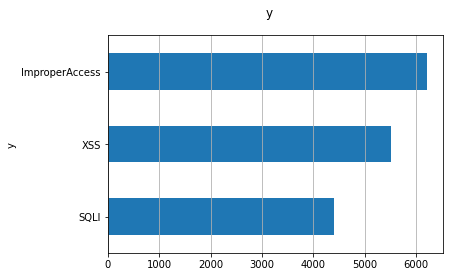

In [84]:
#Univariate distribution to understand data distribution

fig, ax = plt.subplots()
fig.suptitle("y", fontsize=12)
df["y"].reset_index().groupby("y").count().sort_values(by= 
       "index").plot(kind="barh", legend=False, 
        ax=ax).grid(axis='x')
plt.show()

https://towardsdatascience.com/text-classification-with-nlp-tf-idf-vs-word2vec-vs-bert-41ff868d1794

In [86]:
#preprocessing

'''
Preprocess a string.
:parameter
    :param text: string - name of column containing text
    :param lst_stopwords: list - list of stopwords to remove
    :param flg_stemm: bool - whether stemming is to be applied
    :param flg_lemm: bool - whether lemmitisation is to be applied
:return
    cleaned text
'''
def utils_preprocess_text(text, flg_stemm=False, flg_lemm=True, lst_stopwords=None):
    ## clean (convert to lowercase and remove punctuations and   characters and then strip)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
            
    ## Tokenize (convert from string to list)
    lst_text = text.split()
    ## remove Stopwords
    if lst_stopwords is not None:
        lst_text = [word for word in lst_text if word not in 
                    lst_stopwords]
                
    ## Stemming (remove -ing, -ly, ...)
    if flg_stemm == True:
        ps = nltk.stem.porter.PorterStemmer()
        lst_text = [ps.stem(word) for word in lst_text]
                
    ## Lemmatisation (convert the word into root word)
    if flg_lemm == True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        lst_text = [lem.lemmatize(word) for word in lst_text]
            
    ## back to string from list
    text = " ".join(lst_text)
    return text


In [ ]:

lst_stopwords = nltk.corpus.stopwords.words("english")
#lst_stopwords

In [92]:
df["text_clean"] = df["text"].apply(lambda x: 
          utils_preprocess_text(x, flg_stemm=False, flg_lemm=True, 
          lst_stopwords=lst_stopwords))
df.head()

,y,text,text_clean
0,XSS,Add parameterized queries to protect against m...,add parameterized query protect malicious sql ...
1,XSS,Replace malicious sql query\n\nLet's show an a...,replace malicious sql query let show actual at...
2,XSS,Escaped query values to prevent SQL injection ...,escaped query value prevent sql injection inse...
3,XSS,setup a defence for malicious SQL injection,setup defence malicious sql injection
4,XSS,ecure/prevent sql malicious injection,ecureprevent sql malicious injection


In [93]:
## Count (classic BoW)
vectorizer = feature_extraction.text.CountVectorizer(max_features=10000, ngram_range=(1,2))

## Tf-Idf (advanced variant of BoW)
vectorizer = feature_extraction.text.TfidfVectorizer(max_features=10000, ngram_range=(1,2))

In [95]:
corpus = df["text_clean"]
vectorizer.fit(corpus)
X_train = vectorizer.transform(corpus)
dic_vocabulary = vectorizer.vocabulary_

Text(0.5, 1.0, 'Sparse Matrix Sample')

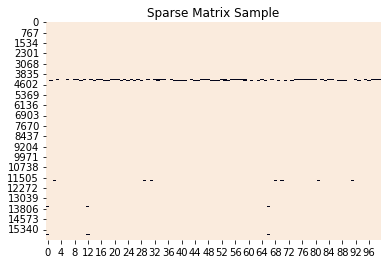

In [96]:
sns.heatmap(X_train.todense()[:,np.random.randint(0,X.shape[1],100)]==0, vmin=0, vmax=1, cbar=False).set_title('Sparse Matrix Sample')

**Word2Vec**

In [104]:
nlp = gensim.models.word2vec.Word2Vec(lst_corpus, size=300,   
            window=8, min_count=1, sg=1, iter=30)  # fit w2v

In [98]:
## tokenize text
tokenizer = kprocessing.text.Tokenizer(lower=True, split=' ', 
                     oov_token="NaN", 
                     filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')
tokenizer.fit_on_texts(lst_corpus)
dic_vocabulary = tokenizer.word_index
## create sequence
lst_text2seq= tokenizer.texts_to_sequences(lst_corpus)
## padding sequence
X_train = kprocessing.sequence.pad_sequences(lst_text2seq, 
                    maxlen=15, padding="post", truncating="post")

In [116]:
word = "malicious"
nlp[word].shape

(300,)

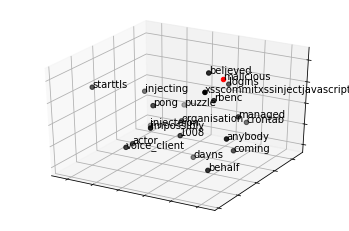

In [137]:
from sklearn.manifold import TSNE

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


word = "malicious"
fig = plt.figure()
## word embedding
tot_words = [word] + [tupla[0] for tupla in 
                 nlp.most_similar(word, topn=20)]
X = nlp[tot_words]
## pca to reduce dimensionality from 300 to 3
pca = manifold.TSNE(perplexity=40, n_components=3, init='pca')
X = pca.fit_transform(X)
## create dtf
dtf_ = pd.DataFrame(X, index=tot_words, columns=["x","y","z"])
dtf_["input"] = 0
dtf_["input"].iloc[0:1] = 1
## plot 3d
from mpl_toolkits.mplot3d import Axes3D
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dtf_[dtf_["input"]==0]['x'], 
           dtf_[dtf_["input"]==0]['y'], 
           dtf_[dtf_["input"]==0]['z'], c="black")
ax.scatter(dtf_[dtf_["input"]==1]['x'], 
           dtf_[dtf_["input"]==1]['y'], 
           dtf_[dtf_["input"]==1]['z'], c="red")
ax.set(xlabel=None, ylabel=None, zlabel=None, xticklabels=[], 
       yticklabels=[], zticklabels=[])
for label, row in dtf_[["x","y","z"]].iterrows():
    x, y, z = row
    ax.text(x, y, z, s=label)

#Try to animate

In [138]:
## tokenize text
tokenizer = kprocessing.text.Tokenizer(lower=True, split=' ', 
                     oov_token="NaN", 
                     filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')
tokenizer.fit_on_texts(lst_corpus)
dic_vocabulary = tokenizer.word_index
## create sequence
lst_text2seq= tokenizer.texts_to_sequences(lst_corpus)
## padding sequence
X_train = kprocessing.sequence.pad_sequences(lst_text2seq, 
                    maxlen=15, padding="post", truncating="post")

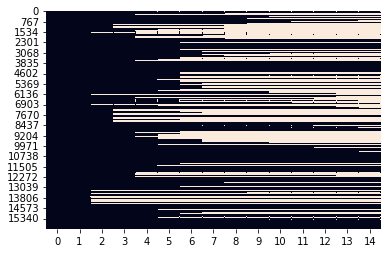

In [139]:
sns.heatmap(X_train==0, vmin=0, vmax=1, cbar=False)
plt.show()

In [143]:
i = 0

## list of text: ["I like this", ...]
len_txt = len(df["text_clean"].iloc[i].split())
print("from: ", df["text_clean"].iloc[i], "| len:", len_txt)

## sequence of token ids: [[1, 2, 3], ...]
len_tokens = len(X_train[i])
print("to: ", X_train[i], "| len:", len(X_train[i]))

## vocabulary: {"I":1, "like":2, "this":3, ...}
print("check: ", df["text_clean"].iloc[i].split()[0], 
      " -- idx in vocabulary -->", 
      dic_vocabulary[df["text_clean"].iloc[i].split()[0]])

print("vocabulary: ", dict(list(dic_vocabulary.items()), "... (padding element, 0)")

from:  add parameterized query protect malicious sql injection | len: 7
to:  [  14 4656  177  465   36    8    7    0    0    0    0    0    0    0
    0] | len: 15
check:  add  -- idx in vocabulary --> 14
vocabulary:  {'NaN': 1, '0': 2, 'vulnerability': 3, 'crosssite': 4, 'multiple': 5} ... (padding element, 0)
